# 3D Frangi vesselness measure example

In [1]:
import numpy as np
import pyqtgraph as pg
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
%gui qt

In [3]:
import sys
sys.path.append('..')
if sys.version_info >= (3,0):
    print("Sorry, requires Python 2.x, not Python 3.x")

In [4]:
import core.frangi as fra
from core.utils import Normalize

In [5]:
VIZ_pyqtgraph = True # set True if you want to use pyqtgraph
VIZ_matplotlib = True # set True if you want to use matplotlib

In [6]:
#load data
fibers = np.fromfile('./data/fibers.raw', dtype='uint16')
fibers = fibers.reshape((100,100,30))
lungs = np.fromfile('./data/lungs.raw', dtype='int32')
lungs = lungs.reshape((50,50,50))
liver = np.fromfile('./data/liver.raw', dtype='int32')
liver = liver.reshape((100,100,50))

In [7]:
# view volumes with pyqtgraph
if VIZ_pyqtgraph:
    pg.image(fibers.T)
    pg.image(lungs.T)
    pg.image(liver.T)

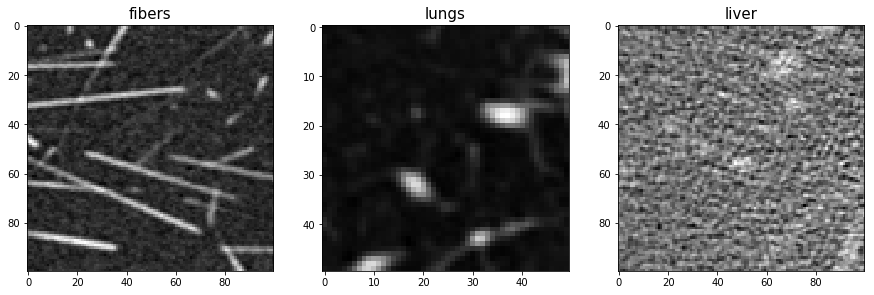

In [8]:
# view a slice with matplotlib
if VIZ_matplotlib:
    SLICE_INDEX = 20
    figure = plt.figure()
    figure.set_size_inches(15,10)

    figure.add_subplot(1,3,1)
    plt.imshow(fibers.T[SLICE_INDEX], cmap='gray')
    plt.title('fibers', fontsize=15)

    figure.add_subplot(1,3,2)
    plt.imshow(lungs.T[SLICE_INDEX], cmap='gray')
    plt.title('lungs', fontsize=15)

    figure.add_subplot(1,3,3)
    plt.imshow(liver.T[SLICE_INDEX], cmap='gray')
    plt.title('liver', fontsize=15)

    plt.show()

# 1. Process fibers

In [9]:
print('fibers')
nfibers = Normalize(fibers,0.,255.)
scales=[1.5,2.0]
fib1=fra.ScaledFrangi3D(nfibers,scales,'bright')

fibers
1.5
|v1|<=|v2|<=|v3|
bright
2.0
|v1|<=|v2|<=|v3|
bright


In [10]:
if VIZ_pyqtgraph:
    pg.image(fibers.T)
    pg.image(fib1.T)

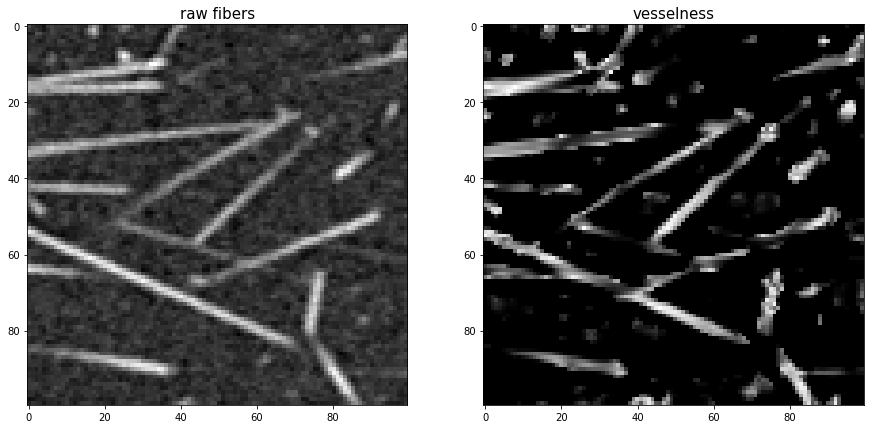

In [11]:
if VIZ_matplotlib:
    SLICE_INDEX = 19

    figure = plt.figure()
    figure.set_size_inches(15,10)

    figure.add_subplot(1,2,1)
    plt.imshow(fibers.T[SLICE_INDEX], cmap='gray')
    plt.title('raw fibers', fontsize=15)

    figure.add_subplot(1,2,2)
    plt.imshow(fib1.T[SLICE_INDEX], cmap='gray')
    plt.title('vesselness', fontsize=15)

    plt.show()

# 2. Process lungs

In [13]:
print('lungs')
scales=[1.5,2.0]
lun1=fra.ScaledFrangi3D(lungs,scales,'bright')

lungs
1.5
|v1|<=|v2|<=|v3|
bright
2.0
|v1|<=|v2|<=|v3|
bright


In [14]:
if VIZ_pyqtgraph:
    pg.image(lun1.T)
    pg.image(lungs.T)

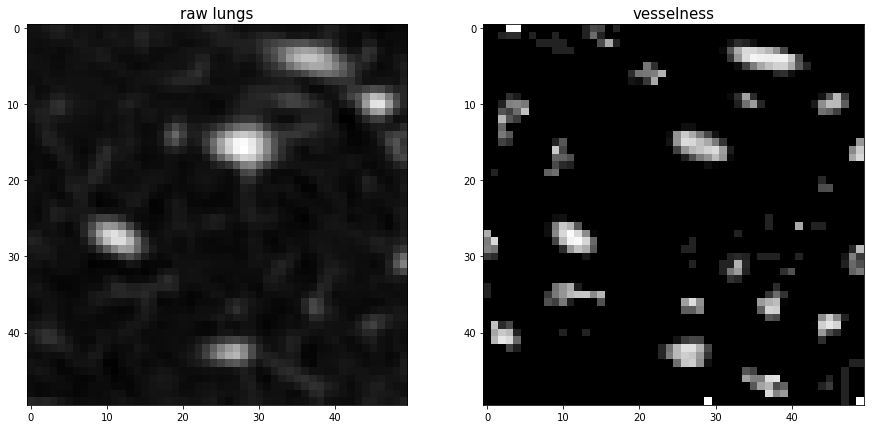

In [15]:
if VIZ_matplotlib:
    SLICE_INDEX = 15

    figure = plt.figure()
    figure.set_size_inches(15,10)

    figure.add_subplot(1,2,1)
    plt.imshow(lungs.T[SLICE_INDEX], cmap='gray')
    plt.title('raw lungs', fontsize=15)

    figure.add_subplot(1,2,2)
    plt.imshow(lun1.T[SLICE_INDEX], cmap='gray')
    plt.title('vesselness', fontsize=15)

    plt.show()

# 3. Process liver

In [16]:
nliver = liver.copy()
nliver[nliver<100]=0
nliver[nliver>140]=140

In [17]:
print('liver')
scales=[2,2.5,3]
liv1=fra.ScaledFrangi3D(nliver,scales,'bright')

cf15=liv1.copy()
thr = 0.5
cf15[cf15>=thr]=1
cf15[cf15<=thr]=0

label_objects, nb_labels = ndi.label(cf15)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 40
mask_sizes[0] = 0
cleaned = mask_sizes[label_objects]

liver
2
|v1|<=|v2|<=|v3|
bright
2.5
|v1|<=|v2|<=|v3|
bright
3
|v1|<=|v2|<=|v3|
bright


In [18]:
if VIZ_pyqtgraph:
    pg.image(liv1.T)
    pg.image(cleaned.T)
    pg.image(liver.T)

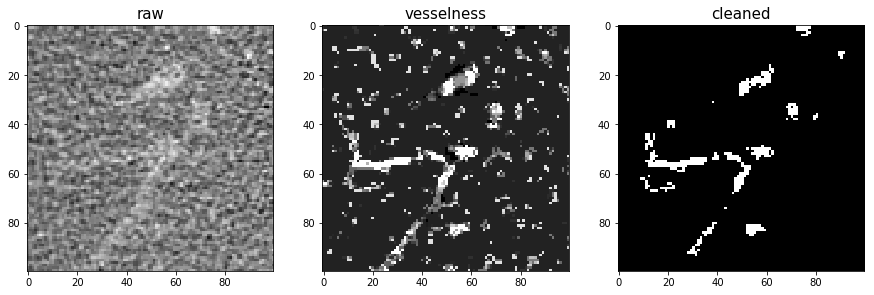

In [19]:
if VIZ_matplotlib:
    SLICE_INDEX = 14

    figure = plt.figure()
    figure.set_size_inches(15,10)

    figure.add_subplot(1,3,1)
    plt.imshow(liver.T[SLICE_INDEX], cmap='gray')
    plt.title('raw', fontsize=15)

    figure.add_subplot(1,3,2)
    plt.imshow(liv1.T[SLICE_INDEX], cmap='gray')
    plt.title('vesselness', fontsize=15)

    figure.add_subplot(1,3,3)
    plt.imshow(cleaned.T[SLICE_INDEX], cmap='gray')
    plt.title('cleaned', fontsize=15)

    plt.show()